## Install libraries

In [37]:
!pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [nbformat]
   -------------------- ------------------- 1/2 [nbformat]
   ---------------------------------------- 2/2 [nbformat]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install -U -q PyDrive

  DEPRECATION: Building 'PyDrive' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'PyDrive'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install plotly

In [8]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [2]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz

## Import Dataset downloaded from Kaggle

In [3]:
df = pd.read_csv("C:\Python\Data\Movie_Data_File.csv")

In [4]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


## Data Preprocesscing

In [5]:
#check NaN data
df.isnull().sum()

Film_title               0
Release_year         10002
Director                10
Cast                    57
Average_rating         581
Owner_rating          9035
Genres                  24
Runtime                 10
Countries              118
Original_language        3
Spoken_languages         3
Description              2
Studios                307
Watches                  0
List_appearances         0
Likes                    0
Fans                     0
½                        0
★                        0
★½                       0
★★                       0
★★½                      0
★★★                      0
★★★½                     0
★★★★                     0
★★★★½                    0
★★★★★                    0
Total_ratings            0
Film_URL                 0
dtype: int64

In [6]:
#check duplicate
df.duplicated().sum()

np.int64(31)

In [7]:
df.info() #check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10002 non-null  object 
 1   Release_year       0 non-null      float64
 2   Director           9992 non-null   object 
 3   Cast               9945 non-null   object 
 4   Average_rating     9421 non-null   float64
 5   Owner_rating       967 non-null    float64
 6   Genres             9978 non-null   object 
 7   Runtime            9992 non-null   float64
 8   Countries          9884 non-null   object 
 9   Original_language  9999 non-null   object 
 10  Spoken_languages   9999 non-null   object 
 11  Description        10000 non-null  object 
 12  Studios            9695 non-null   object 
 13  Watches            10002 non-null  int64  
 14  List_appearances   10002 non-null  int64  
 15  Likes              10002 non-null  int64  
 16  Fans               100

In [8]:
df.describe(include='all').T #describe statistics 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Film_title,10002,9667,Hercules,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release_year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,9992,4763,Chuck Jones,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cast,9945,9878,['Mel Blanc'],18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average_rating,9421.0,NaN,NaN,NaN,3.268535,0.54166,1.08,2.92,3.3,3.65,4.71
Owner_rating,967.0,NaN,NaN,NaN,2.98759,0.903954,0.5,2.5,3.0,3.5,5.0
Genres,9978,2396,['Drama'],759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,9992.0,NaN,NaN,NaN,103.168335,38.08611,2.0,89.0,99.0,113.0,907.0
Countries,9884,857,['USA'],5408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original_language,9999,56,English,8075,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop_duplicates(subset=['Film_title', 'Release_year'], keep='first')

In [10]:
df.duplicated().sum() #check duplicate again

np.int64(0)

In [11]:
df.isnull().sum() #check NaN data again

Film_title              0
Release_year         9667
Director                9
Cast                   52
Average_rating        555
Owner_rating         8731
Genres                 23
Runtime                 8
Countries             114
Original_language       3
Spoken_languages        3
Description             2
Studios               297
Watches                 0
List_appearances        0
Likes                   0
Fans                    0
½                       0
★                       0
★½                      0
★★                      0
★★½                     0
★★★                     0
★★★½                    0
★★★★                    0
★★★★½                   0
★★★★★                   0
Total_ratings           0
Film_URL                0
dtype: int64

In [12]:
df.dropna(subset=['Description','Original_language','Spoken_languages'], inplace=True)

In [13]:
df.drop('Release_year', axis=1)

,Film_title,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,Spoken_languages,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,['German'],...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,['English'],...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,"['English', 'French', 'German', 'Italian', 'La...",...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,"['English', 'Japanese']",...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,['Japanese'],...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,Evil Never Dies,Uli Edel,"['Thomas Gibson', 'Katherine Heigl', 'John Wat...",NaN,NaN,"['TV Movie', 'Thriller', 'Horror']",205.0,['USA'],English,['English'],...,9,9,7,10,3,3,0,5,56,https://letterboxd.com/film/evil-never-dies/
9998,The Master Butcher,Uli Edel,"['Jonas Nay', 'Aylin Tezel', 'Leonie Benesch',...",NaN,NaN,"['TV Movie', 'Drama']",176.0,"['Croatia', 'Germany']",German,"['German', 'English']",...,5,11,17,43,33,43,5,9,170,https://letterboxd.com/film/the-master-butcher/
9999,Unterm Birnbaum,Uli Edel,"['Fritz Karl', 'Julia Koschitz', 'Peter Schnei...",NaN,NaN,"['Drama', 'TV Movie']",89.0,['Germany'],German,['German'],...,6,13,20,9,4,3,0,0,61,https://letterboxd.com/film/unterm-birnbaum-2019/
10000,Simulant,April Mullen,"['Robbie Amell', 'Jordana Brewster', 'Simu Liu...",2.26,1.0,"['Thriller', 'Science Fiction']",95.0,['Canada'],English,['English'],...,421,897,642,491,184,103,14,41,3274,https://letterboxd.com/film/simulant/


In [14]:
# Handle NaN and missing values
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Average_rating'].fillna('Unknown', inplace=True)
df['Owner_rating'].fillna('Unknown', inplace=True)
df['Genres'].fillna('Unknown', inplace=True)
df['Studios'].fillna('Unknown', inplace=True)
df['Countries'].fillna('Unknown', inplace=True)

df['Runtime'].fillna(df['Runtime'].mean(), inplace=True)

C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2464658114.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2464658114.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [15]:
import plotly.graph_objects as go
import plotly.express as px

movie_type_counts = df['Studios'].value_counts()

# Group smaller genres into "Other"
threshold = 15  # Adjust as needed
other_count = movie_type_counts[movie_type_counts >= threshold].sum()
movie_type_counts = movie_type_counts[movie_type_counts >= threshold]
movie_type_counts['Other'] = other_count

fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values, hole=0.3))

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Studios With Highest Number Of Films Production',
    title_font_size=20,
    legend_font_size=12,
    showlegend=True
)

fig.update_traces(
    textinfo='percent+label',  # Display percentage and label
    textposition='inside',      # Position text inside the slices
    insidetextorientation='radial',
    marker=dict(colors=px.colors.qualitative.Set1)  # Apply color sequence
)

fig.show()

In [16]:
top_countries = df['Countries'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Countries with Highest Number of Movies',
)
fig.show()

In [17]:
import plotly.express as px

fig = px.histogram(df, x="Average_rating", nbins=100)  # Adjust nbins as needed
fig.update_layout(title="Movie Average Ratings Distribution")
fig.show()

In [20]:
import plotly.express as px

fig = px.histogram(df, x="Runtime", nbins=100)  # Adjust nbins as needed
fig.update_layout(title="Movie Duration")
fig.show()

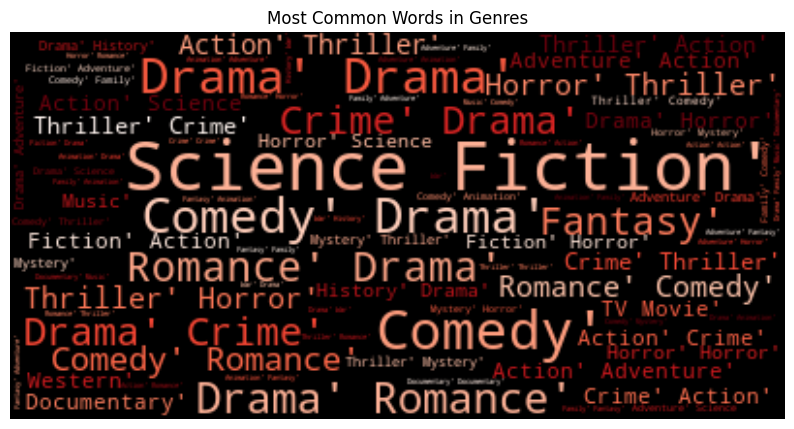

In [21]:
titles = df['Genres'].values

text = ' '.join(titles.astype(str))

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Genres', color='black')
plt.show()

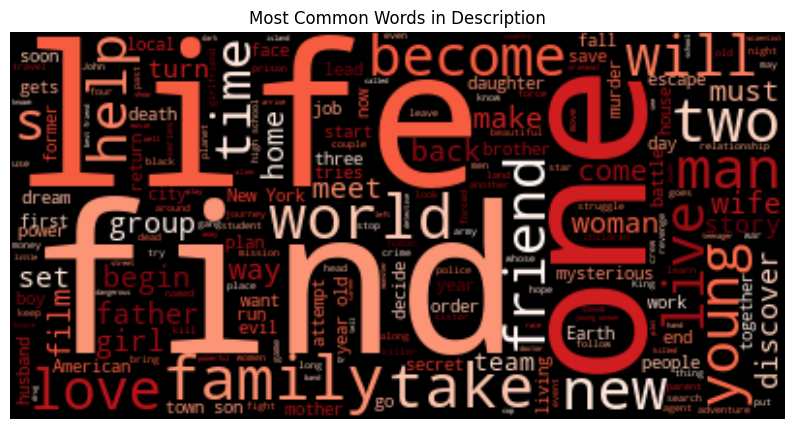

In [22]:
titles = df['Description'].values

text = ' '.join(titles.astype(str))

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Description', color='black')
plt.show()

## Data Featuring

In [23]:
new_data = df[['Film_title', 'Genres', 'Director', 'Cast', 'Countries', 'Original_language', 'Description','Studios','Spoken_languages']]
new_data.set_index('Film_title', inplace=True)

In [24]:
new_data.head()

,Genres,Director,Cast,Countries,Original_language,Description,Studios,Spoken_languages
Film_title,,,,,,,,
The Fan,"['Horror', 'Drama']",Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",['Germany'],German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],['German']
Mad Max: Fury Road,"['Adventure', 'Science Fiction', 'Action']",George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...","['Australia', 'USA']",English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",['English']
Suspiria,['Horror'],Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",['Italy'],English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],"['English', 'French', 'German', 'Italian', 'La..."
Lost in Translation,"['Drama', 'Comedy', 'Romance']",Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...","['UK', 'USA']",English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']","['English', 'Japanese']"
Akira,"['Animation', 'Action', 'Science Fiction']",Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",['Japan'],Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",['Japanese']


### Text Cleaner

In [ ]:
class TextCleaner: #a function to clean text data
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [26]:
cleaner = TextCleaner()

In [27]:
# Access and modify the index directly:
new_data.index = new_data.index.map(cleaner.remove_space)

# Apply the cleaning functions.
new_data['Director']    = new_data['Director'].astype(str).apply(cleaner.separate_text)
new_data['Countries']    = new_data['Countries'].astype(str).apply(cleaner.clean_text)
new_data['Cast']        = new_data['Cast'].astype(str).apply(cleaner.clean_text)
new_data['Genres']        = new_data['Genres'].astype(str).apply(cleaner.clean_text)
new_data['Studios']        = new_data['Studios'].astype(str).apply(cleaner.clean_text)
new_data['Spoken_languages']      = new_data['Spoken_languages'].astype(str).apply(cleaner.clean_text)
new_data['Original_language']   = new_data['Original_language'].astype(str).apply(cleaner.separate_text)
new_data['Description'] = new_data['Description'].astype(str).apply(cleaner.remove_punc)

C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2837459135.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2837459135.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2837459135.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
new_data.head() #dat after cleaning

,Genres,Director,Cast,Countries,Original_language,Description,Studios,Spoken_languages
Film_title,,,,,,,,
thefan,horrordrama,eckhart schmidt,désiréenosbuschbodostaigernikolaihoffmannmicha...,germany,german,the heroworship that simone has for a pop sing...,barbaramoorseworkshop,german
madmax:furyroad,actionadventuresciencefiction,george miller,juddwildtomhardynathanjonesrileykeoughgadaffid...,usaaustralia,english,an apocalyptic story set in the furthest reach...,warnerbrospicturesvillageroadshowpicturesratpa...,english
suspiria,horror,dario argento,renatoscarpagiovannidibernardorenatazamengodia...,italy,english,an american newcomer to a prestigious german b...,sedaspettacoli,germanlatinenglishfrenchitalian
lostintranslation,romancecomedydrama,sofia coppola,junmakihirokokawasakikoichitanakaakiraryokondo...,ukusa,english,two lost souls visiting tokyo the young neglec...,elementalfilmsamericanzoetrope,englishjapanese
akira,animationactionsciencefiction,katsuhiro otomo,kazuhirokamifujitatsuhikonakamuramitsuoiwatatr...,japan,japanese,a secret military project endangers neotokyo w...,tokyomovieshinshabandaientertainmentmbsstudiof...,japanese


In [29]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2626107315.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tdqkh\AppData\Local\Temp\ipykernel_6268\2626107315.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
new_data.head()

,BoW
Film_title,
thefan,horrordrama eckhart schmidt désiréenosbuschbod...
madmax:furyroad,actionadventuresciencefiction george miller ju...
suspiria,horror dario argento renatoscarpagiovannidiber...
lostintranslation,romancecomedydrama sofia coppola junmakihiroko...
akira,animationactionsciencefiction katsuhiro otomo ...


In [31]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

### Calculate Cosine Similarity of movies

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

#Reduce dimensions to improve similarity
svd = TruncatedSVD(n_components=250)
X_reduced = svd.fit_transform(tfid_matrix)

cosine_sim = cosine_similarity(X_reduced)

In [33]:
cosine_sim

array([[1.        , 0.07539482, 0.31015132, ..., 0.4084897 , 0.18075322,
        0.09523019],
       [0.07539482, 1.        , 0.11627792, ..., 0.09292366, 0.16578104,
        0.18767482],
       [0.31015132, 0.11627792, 1.        , ..., 0.2655003 , 0.1038269 ,
        0.13558188],
       ...,
       [0.4084897 , 0.09292366, 0.2655003 , ..., 1.        , 0.05987427,
        0.04204125],
       [0.18075322, 0.16578104, 0.1038269 , ..., 0.05987427, 1.        ,
        0.17534835],
       [0.09523019, 0.18767482, 0.13558188, ..., 0.04204125, 0.17534835,
        1.        ]])

In [34]:
final_data = df[['Film_title', 'Director', 'Genres', 'Average_rating', 'Runtime', 'Countries']]

In [35]:
final_data.head()

,Film_title,Director,Genres,Average_rating,Runtime,Countries
0,The Fan,Eckhart Schmidt,"['Horror', 'Drama']",3.57,92.0,['Germany']
1,Mad Max: Fury Road,George Miller,"['Adventure', 'Science Fiction', 'Action']",4.18,121.0,"['Australia', 'USA']"
2,Suspiria,Dario Argento,['Horror'],3.93,99.0,['Italy']
3,Lost in Translation,Sofia Coppola,"['Drama', 'Comedy', 'Romance']",3.79,102.0,"['UK', 'USA']"
4,Akira,Katsuhiro Otomo,"['Animation', 'Action', 'Science Fiction']",4.28,124.0,['Japan']


In [38]:
final_data.to_csv('clean_movie_data.csv',index=False)

## Movies Recommendation

In [54]:
import re

class RecommendationsSystems:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim

    def recommendation_movie(self, Film_title, total_result=5, threshold=0.2):
        idx = self.find_movies(Film_title)
        
        if (idx == -1):
            #print(f"Movie '{Film_title}' not found in the dataset.")
            return []  # Single list is sufficient

        sim_df = self.df.copy()
        sim_df['similarity'] = self.cosine_sim[idx]
        sort_df = sim_df.sort_values(by='similarity', ascending=False)[1:total_result + 1]
        sort_df = sort_df[sort_df['similarity'] >= threshold]

        recommendation_movie = []
        for _, row in sort_df.iterrows():  # Iterate through the similar movies
            recommendation_movie.append(row.to_dict())  # Convert row to dictionary and append

        return recommendation_movie
    
    def recommendation_genres(self, Genres, total_result=5, threshold=0.2):
        idy = self.find_genres(Genres)
        
        if (idy == -1):
            #print(f"Movie '{Film_title}' not found in the dataset.")
            return []  # Single list is sufficient

        sim_df = self.df.copy()
        sim_df['similarity'] = self.cosine_sim[idy]
        sort_df = sim_df.sort_values(by='similarity', ascending=False)[1:total_result + 1]
        sort_df = sort_df[sort_df['similarity'] >= threshold]

        recommendation_movie = []
        for _, row in sort_df.iterrows():  # Iterate through the similar movies
            recommendation_movie.append(row.to_dict())  # Convert row to dictionary and append

        return recommendation_movie

    def find_movies(self, movie_name):
        for index, title in enumerate(self.df['Film_title']):
          if re.search(movie_name, title, re.IGNORECASE):
              print(f"Found '{movie_name}' in '{title}' at index {index}")
              return index
        print(f"No result found for '{movie_name}'")
        return -1
    
    def find_genres(self, types):
        for index, gens in enumerate(self.df['Genres']):
          if re.search(types, gens, re.IGNORECASE):
              print(f"Found '{types}' in '{gens}' at index {index}")
              return index
        print(f"No result found for '{types}'")
        return -1


In [55]:
RS = RecommendationsSystems(final_data, cosine_sim)
movie_title = input("Enter your movie's name: ")
ReCys_movies = RS.recommendation_movie(movie_title, total_result=5, threshold=0.2)

if ReCys_movies:
    print('Similar Movie(s) list:\n')
    for movie in ReCys_movies:
        print(f"TITLE: {movie['Film_title']}")
        print(f"GENRES: {movie['Genres']}")
        print(f"IMDBs: {movie['Average_rating']}")
        print(f"DURATION: {movie['Runtime']} minutes")
        print(f"COUNTRY: {movie['Countries']}")
        print(f"DIRECTOR: {movie['Director']}")
        print("-" * 60)  # Separator between movies
else:
    print(f"No recommendations found for the '{movie_title} movie's title '\n")
    movie_genres = input('You can enter your favorite genres instead: ')
    ReCys_genres = RS.recommendation_genres(movie_genres, total_result=5, threshold=0.2)
    if ReCys_genres:
        print('Similar Movie(s) list based on genres:\n')
        for gens in ReCys_genres:
            print(f"TITLE: {gens['Film_title']}")
            print(f"GENRES: {gens['Genres']}")
            print(f"IMDBs: {gens['Average_rating']}")
            print(f"DURATION: {gens['Runtime']} minutes")
            print(f"COUNTRY: {gens['Countries']}")
            print(f"DIRECTOR: {gens['Director']}")
            print("-" * 60)  # Separator between movies
    else:
        print(f"No recommendations found for the genres: '{movie_genres}'")
        
if (ReCys_movies == -1 and ReCys_genres == -1):
    print("No recommendations found for both movie title and genres.")



Found 'harry potter' in 'Harry Potter and the Deathly Hallows: Part 2' at index 287
Similar Movie(s) list:

TITLE: Harry Potter and the Deathly Hallows: Part 1
GENRES: ['Fantasy', 'Adventure']
IMDBs: 3.72
DURATION: 146.0 minutes
COUNTRY: ['UK', 'USA']
DIRECTOR: David Yates
------------------------------------------------------------
TITLE: Harry Potter and the Half-Blood Prince
GENRES: ['Adventure', 'Fantasy']
IMDBs: 3.7
DURATION: 153.0 minutes
COUNTRY: ['UK', 'USA']
DIRECTOR: David Yates
------------------------------------------------------------
TITLE: Harry Potter and the Order of the Phoenix
GENRES: ['Adventure', 'Fantasy']
IMDBs: 3.68
DURATION: 138.0 minutes
COUNTRY: ['UK', 'USA']
DIRECTOR: David Yates
------------------------------------------------------------
TITLE: Fantastic Beasts: The Secrets of Dumbledore
GENRES: ['Fantasy', 'Adventure']
IMDBs: 2.56
DURATION: 142.0 minutes
COUNTRY: ['UK', 'USA']
DIRECTOR: David Yates
--------------------------------------------------------